In [1]:
%pip install xgboost
%pip install tensorflow
%pip install --upgrade tensorflow
%pip install --upgrade pip
%pip install --upgrade Pillow
%pip install --upgrade mlxtend

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Importing the Libraries

In [2]:
import math
import pandas as pd 
import numpy as np
import re
import requests
import wordcloud
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch
import random
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('omw-1.4')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from mlxtend.evaluate import bias_variance_decomp
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from urllib import request
from random import randint

[nltk_data] Downloading package stopwords to C:\Users\Lab
[nltk_data]     11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Lab
[nltk_data]     11\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Lab
[nltk_data]     11\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Lab
[nltk_data]     11\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Data Preparing and Preprocessing

In [3]:
urls = ["https://www.gutenberg.org/files/50928/50928.txt"
,"https://www.gutenberg.org/files/29181/29181.txt"
,"https://www.gutenberg.org/files/69703/69703-0.txt"
,"https://www.gutenberg.org/files/30214/30214.txt"
,"https://www.gutenberg.org/files/64873/64873-0.txt"]
Names = ["Hot Planet" ,"Foundling on Venus" , "The master mind of Mars"  , "The Red Hell of Jupiter" ,"Ice Planet"]
Authors = ["Hal Clement" ,"Dorothy De Courcy and John De Courcy" ,"Edgar Rice Burroughs" , "Paul Ernst" ,"Carl Selwyn"]
Labels = [ 'a' ,'b' ,'c','d' ,'e']

In [4]:
def prepare_data(url, name, author, label,index):

    response = request.urlopen(url)
    lines = (response.read().decode('utf8')).lower()
    tokens= regexp_tokenize(lines,r'([a-zA-Z]{3,})[\,|\s|\.]')

    isalpha = [word.lower() for word in tokens if word.isalpha()]

    stop_words = set(stopwords.words('english'))
    nostop = [w for w in isalpha if not w in stop_words]

    lemma=[]
    lemmatizer = WordNetLemmatizer()
    lemma=[lemmatizer.lemmatize(w) for w in nostop]

    book = []
    for i in range(200):
        start = random.randint(0 , len(lemma)-150)
        book.append(' '.join( lemma[start:start+150]))

        df = pd.DataFrame()
        df["100_Words"] = book
        df["title"] = name
        df["Author"] = author
        df["label"] = label
        df["index"] = index
    return df

In [5]:
data = pd.DataFrame()
for index, (url, name, author, label) in enumerate(zip(urls, Names, Authors, Labels)):
    data = pd.concat([data, prepare_data(url, name, author, label, index)])

data.reset_index(drop=True, inplace=True)
data

,100_Words,title,Author,label,index
0,stuff likely enough aiello replied remember th...,Hot Planet,Hal Clement,a,0
1,shrugged suppose also luck sent darkside know ...,Hot Planet,Hal Clement,a,0
2,could laid faster walk without ladle much less...,Hot Planet,Hal Clement,a,0
3,gutenberg registered trademark may used charge...,Hot Planet,Hal Clement,a,0
4,driven darkness managed one two brief talk lef...,Hot Planet,Hal Clement,a,0
...,...,...,...,...,...
995,yes sir martian smiled turned wait said trexel...,Ice Planet,Carl Selwyn,e,4
996,men running falling lying still boat swooped t...,Ice Planet,Carl Selwyn,e,4
997,paused door building hines pushed button wait ...,Ice Planet,Carl Selwyn,e,4
998,provision indemnity agree indemnify hold found...,Ice Planet,Carl Selwyn,e,4


# Data Visualizations

#Initialize a t-SNE object with the desired hyperparameters
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

#Fit the t-SNE model to the data and obtain the low-dimensional representation
data_tsne = tsne.fit_transform(data)

#Visualize the low-dimensional representation using a scatter plot
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.show()


 The most frequent 50 words of book a



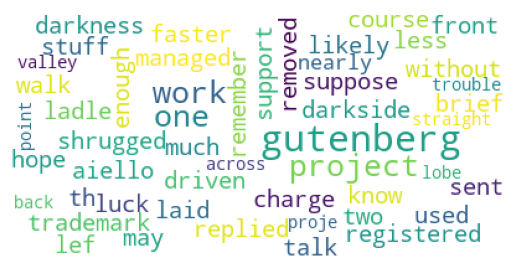


 The most frequent 50 words of book b



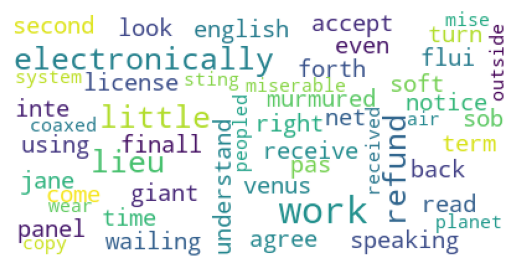


 The most frequent 50 words of book c



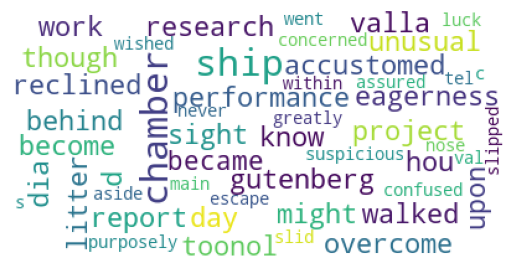


 The most frequent 50 words of book d



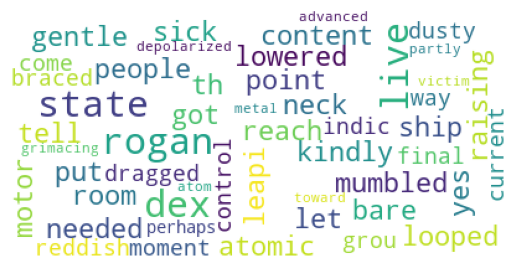


 The most frequent 50 words of book e



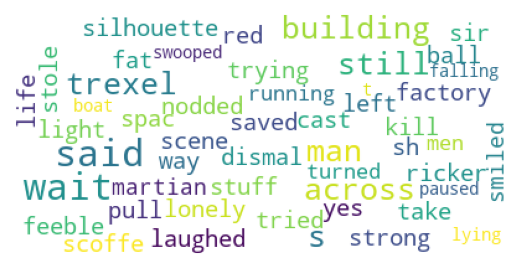

In [6]:
for label in data['label'].unique(): 
    books = data[data["label"]==label]["100_Words"]
    print(f"\n The most frequent 50 words of book {label}\n")
    wcloud = wordcloud.WordCloud(background_color='white', max_words=50, max_font_size=30)
    wcloud = wcloud.generate(str(books))
    plt.axis('off')
    plt.imshow(wcloud , cmap=None)
    plt.show()

# Feature Engineering

###  1) Bag of Words(BOW)

In [7]:
count_Vector= CountVectorizer()
bow = count_Vector.fit_transform(data['100_Words'])
bow_df = pd.DataFrame(bow.toarray(), columns=count_Vector.get_feature_names())
bow_df

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandoned,abide,able,ablest,aboard,abrupt,abruptly,absence,absently,absolute,...,zaino,zak,zephyr,zero,zinc,zip,zode,zone,zoom,zoomed
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split the Data into Training, Validation and Testing

In [8]:
X = bow.toarray()
Y = data['label']

print(X.shape)
print(Y.shape)

(1000, 7236)
(1000,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 0)  

In [10]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, '-', color="g", label="Cross-validation score")

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
    return plt

In [11]:
def build_model(model, model_name, x_train, x_test, x_val, y_train, y_test, y_val, cross_valid):

    global general_model
    general_model = model.fit(x_train, y_train) 
    global y_pred
    y_pred = model.predict(x_test)
    global y_val_pred
    y_val_pred = model.predict(x_val)
    
    #K_Fold Cross Vaildation
    cv_accuracies = cross_val_score(estimator=model , X=x_train , y=y_train ,cv=cross_valid)
    #Measure the accuracy of the model (bais)
    accuracy_avg = cv_accuracies.mean()
    test_accuracy = accuracy_score(y_test, y_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    #Model performance evaluation 
    print("Cross Validation Accuracy :  ", cv_accuracies)
    print("\n Average Cross Validation Accuracy :  " , accuracy_avg)
    print("\n Testing accuracy :  "  ,test_accuracy)
    print("\n Validation accuracy :  "  ,val_accuracy)
    print("----------------------------------------------------------------------------------------------")

    print(classification_report(y_test, y_pred))

    #Confusion Matrix
    print('\n Confusion Matrix: \n')
    print(confusion_matrix(y_test, y_pred))
    plot_learning_curve(general_model,"Learning Curve of "+ model_name, x_train, y_train, ylim=(0, 1.1), cv=cross_valid, n_jobs=8)

    print("----------------------------------------------------------------------------------------------")

In [12]:
def analyze_error(x_train, y_train, x_test, y_test ,y_pred):
    errors  = [] 
    errors_correct = []
    predict = []
    arr = np.array(y_test)

    for index ,text in enumerate(x_test) :
        if y_pred[index] != arr[index]:
            error = text
            errors.append(error)
            correct = arr[index]
            errors_correct.append(correct)
            pred = y_pred[index]
            predict.append(pred)
            
    document_df = pd.DataFrame()
    document_df['Document_error'] = errors
    document_df['Correct']   = correct
    document_df['Predicted'] = predict
 
    print(" The Documents misclassified by the model are : " , len(errors))
    print("----------------------------------------------------------------------------------------------\n")
 
    label_encoder = preprocessing.LabelEncoder()
    x_train_cp = np.copy(x_train)
    x_test_cp = np.copy(x_test)
    y_train_cp = np.copy(y_train)
    y_test_cp = np.copy(y_test)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(general_model, np.array(x_train_cp), label_encoder.fit_transform(y_train_cp), np.array(x_test_cp), label_encoder.fit_transform(y_test_cp), num_rounds=2, random_seed=0)
  
    print('Average bias : %.3f' % avg_bias)
    print('Average variance : %.3f' % avg_var)
    print("----------------------------------------------------------------------------------------------")

    return document_df 

# Support Vector Machine (BOW)

Cross Validation Accuracy :   [0.96666667 0.83333333 0.93333333 0.93333333 0.85       0.86666667
 0.95       0.86666667 0.88333333 0.9       ]

 Average Cross Validation Accuracy :   0.8983333333333334

 Testing accuracy :   0.895

 Validation accuracy :   0.89
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.71      0.85      0.77        26
           b       0.93      0.82      0.87        49
           c       0.95      0.88      0.91        41
           d       0.91      0.95      0.93        44
           e       0.93      0.97      0.95        40

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200


 Confusion Matrix: 

[[22  2  0  1  1]
 [ 5 40  2  2  0]
 [ 3  0 36  1  1]
 [ 0  1  0 42  1]
 [ 1  0  0  0 39]]
-----------------------------------------

,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,a
1,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,a
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,a
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,d
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,e


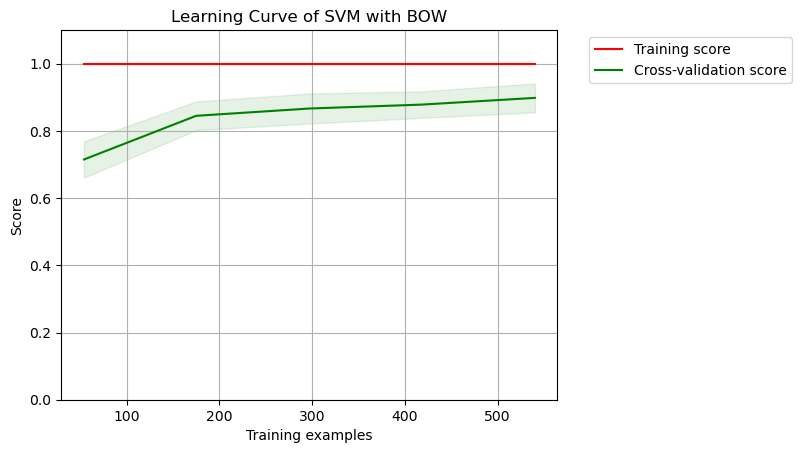

In [13]:
svm_bow = SVC(kernel='linear')
build_model(svm_bow, "SVM with BOW", X_train, X_test, X_val, y_train, y_test ,y_val, 10)

svm_bow_error = analyze_error(X_train, y_train, X_test, y_test, y_pred)
display(svm_bow_error.head())

# Random Forest (BOW)

Cross Validation Accuracy :   [0.9        0.8        0.9        0.93333333 0.85       0.86666667
 0.95       0.86666667 0.83333333 0.9       ]

 Average Cross Validation Accuracy :   0.8799999999999999

 Testing accuracy :   0.89

 Validation accuracy :   0.88
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.73      0.85      0.79        26
           b       0.84      0.84      0.84        49
           c       0.95      0.88      0.91        41
           d       0.95      0.93      0.94        44
           e       0.95      0.95      0.95        40

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200


 Confusion Matrix: 

[[22  4  0  0  0]
 [ 4 41  2  1  1]
 [ 3  1 36  1  0]
 [ 0  2  0 41  1]
 [ 1  1  0  0 38]]
------------------------------------------

,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,b
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,a
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,a
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,e
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,a


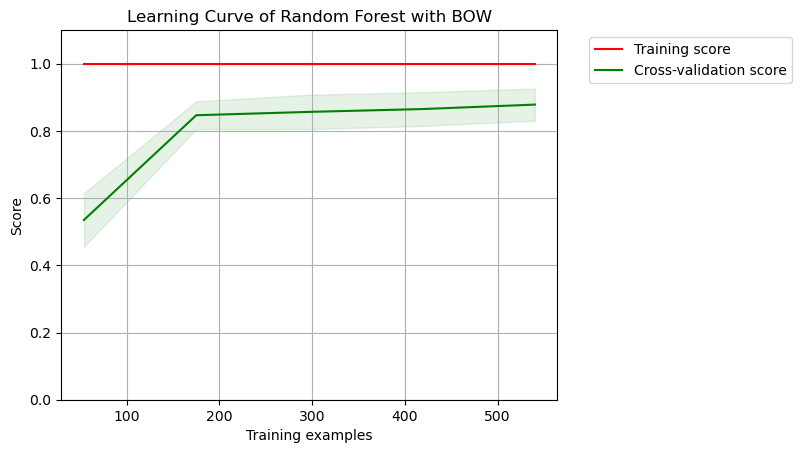

In [14]:
rf_bow = RandomForestClassifier(n_estimators=100)
build_model(rf_bow, "Random Forest with BOW", X_train, X_test, X_val, y_train, y_test ,y_val ,10)

rf_bow_error = analyze_error(X_train, y_train, X_test, y_test, y_pred)
display(rf_bow_error.head())

# Naïve Bayes (BOW)

Cross Validation Accuracy :   [0.9        0.78333333 0.9        0.93333333 0.86666667 0.83333333
 0.93333333 0.9        0.78333333 0.85      ]

 Average Cross Validation Accuracy :   0.8683333333333334

 Testing accuracy :   0.895

 Validation accuracy :   0.875
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       1.00      0.77      0.87        26
           b       0.70      1.00      0.82        49
           c       1.00      0.88      0.94        41
           d       1.00      0.91      0.95        44
           e       1.00      0.85      0.92        40

    accuracy                           0.90       200
   macro avg       0.94      0.88      0.90       200
weighted avg       0.93      0.90      0.90       200


 Confusion Matrix: 

[[20  6  0  0  0]
 [ 0 49  0  0  0]
 [ 0  5 36  0  0]
 [ 0  4  0 40  0]
 [ 0  6  0  0 34]]
----------------------------------------

,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b


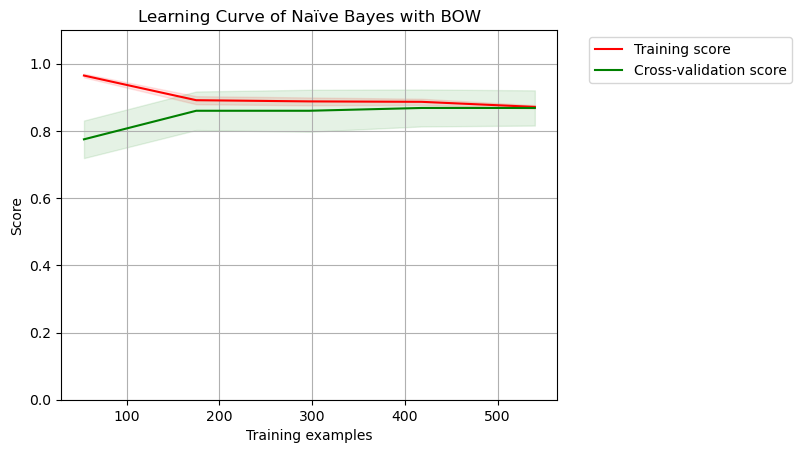

In [15]:
nb_bow = MultinomialNB()
build_model(nb_bow, "Naïve Bayes with BOW", X_train, X_test, X_val, y_train, y_test ,y_val ,10)

nb_bow_error = analyze_error(X_train, y_train, X_test, y_test, y_pred)
display(nb_bow_error.head())

# K-Nearest Neighbour (BOW)

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Cross Validation Accuracy :   [0.81666667 0.73333333 0.88333333 0.93333333 0.85       0.83333333
 0.9        0.81666667 0.78333333 0.88333333]

 Average Cross Validation Accuracy :   0.8433333333333334

 Testing accuracy :   0.86

 Validation accuracy :   0.84
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.58      0.85      0.69        26
           b       0.83      0.78      0.80        49
           c       1.00      0.88      0.94        41
           d       1.00      0.91      0.95        44
           e       0.90      0.90      0.90        40

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.88      0.86      0.87       200


 Confusion Matrix: 

[[22  2  0  0  2]
 [10 38  0  0  1]
 [ 3  2 36  0  0]
 [ 1  2  0 40  1]
 [ 2  2  0  0 36]]
------------------------------------------

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Average bias : 0.165
Average variance : 0.077
----------------------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,b
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,b
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,a
3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,a
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,a


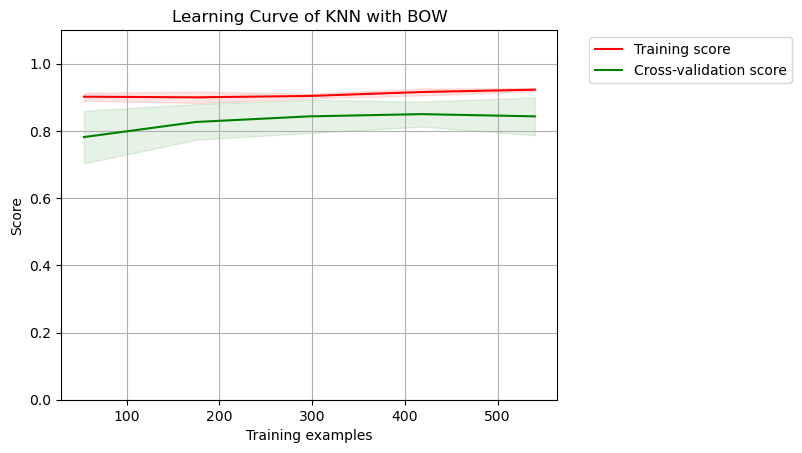

In [16]:
knn_bow = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree', p=1)
build_model(knn_bow, "KNN with BOW", X_train, X_test, X_val, y_train, y_test ,y_val ,10)

KNN_Bow_error = analyze_error(X_train, y_train, X_test, y_test ,y_pred)
display(KNN_Bow_error.head())

# XG-Boost (BOW)

Cross Validation Accuracy :   [0.91666667 0.78333333 0.93333333 0.95       0.88333333 0.9
 0.93333333 0.88333333 0.85       0.86666667]

 Average Cross Validation Accuracy :   0.89

 Testing accuracy :   0.9

 Validation accuracy :   0.875
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        26
           1       0.88      0.88      0.88        49
           2       0.97      0.90      0.94        41
           3       1.00      0.91      0.95        44
           4       0.93      0.95      0.94        40

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.91      0.90      0.90       200


 Confusion Matrix: 

[[22  3  0  0  1]
 [ 5 43  0  0  1]
 [ 3  1 37  0  0]
 [ 0  2  1 40  1]
 [ 2  0  0  0 38]]
---------------------------------------------------------------

,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,4
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,4
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,1
3,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,2
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,3


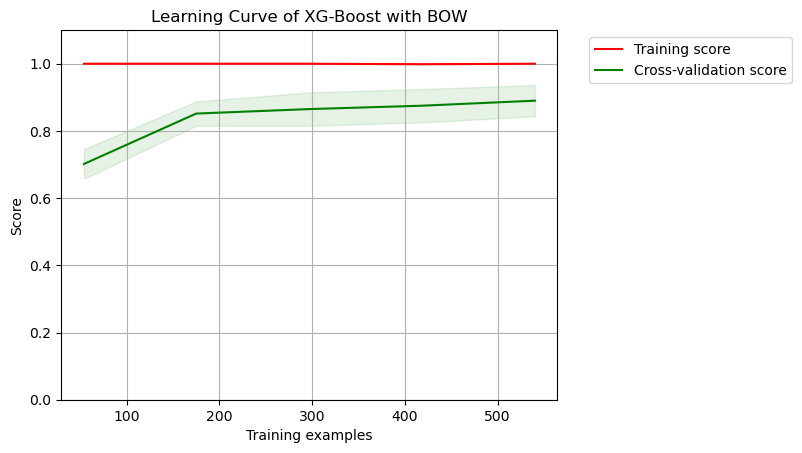

In [17]:
le = preprocessing.LabelEncoder()
xgb_bow = XGBClassifier()

y_train_XGBoost = le.fit_transform(y_train)
y_test_XGBoost = le.fit_transform(y_test)
y_val_XGBoost = le.fit_transform(y_val)

build_model(xgb_bow, "XG-Boost with BOW", X_train, X_test, X_val, y_train_XGBoost, y_test_XGBoost ,y_val_XGBoost ,10)

xgb_bow_error = analyze_error(X_train, y_train, X_test, y_test, y_pred)
display(xgb_bow_error.head())

# Stochastic Gradient Descent (BOW)

Cross Validation Accuracy :   [0.9        0.78333333 0.91666667 0.91666667 0.85       0.85
 0.91666667 0.88333333 0.83333333 0.88333333]

 Average Cross Validation Accuracy :   0.8733333333333333

 Testing accuracy :   0.885

 Validation accuracy :   0.905
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.65      0.85      0.73        26
           b       0.86      0.86      0.86        49
           c       0.97      0.88      0.92        41
           d       0.98      0.91      0.94        44
           e       0.95      0.93      0.94        40

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.90      0.89      0.89       200


 Confusion Matrix: 

[[22  3  0  0  1]
 [ 5 42  1  1  0]
 [ 3  2 36  0  0]
 [ 1  2  0 40  1]
 [ 3  0  0  0 37]]
----------------------------------------------

,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,a
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,a
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,a
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,d
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,e


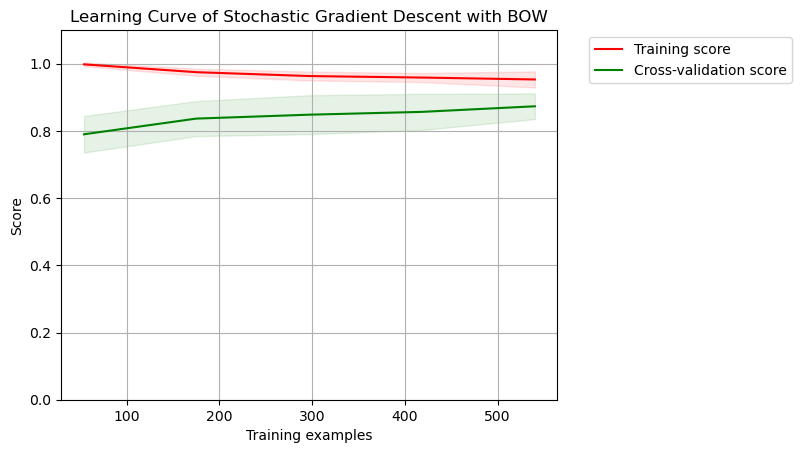

In [18]:
sgd_bow = SGDClassifier(loss='log')
build_model(sgd_bow, "Stochastic Gradient Descent with BOW", X_train, X_test, X_val, y_train, y_test ,y_val ,10)

sgd_bow_error = analyze_error(X_train, y_train, X_test, y_test, y_pred)
display(sgd_bow_error.head())

###  2) Term Frequency - Inverse Document Frequency (TF_IDF)

In [19]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data['100_Words'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
tfidf_df

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandoned,abide,able,ablest,aboard,abrupt,abruptly,absence,absently,absolute,...,zaino,zak,zephyr,zero,zinc,zip,zode,zone,zoom,zoomed
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.054876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.163646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.079262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.169949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Split the Data into Training, Validation and Testing

In [20]:
X_tfidf = tfidf.toarray()
y_tfidf = data['label']

print(X_tfidf.shape)
print(y_tfidf.shape)

(1000, 7236)
(1000,)


In [21]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, shuffle = True, random_state = 0)
X_train_tfidf, X_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(X_train_tfidf, y_train_tfidf, test_size=0.25, random_state= 0)  

# Support Vector Machine (TF_IDF)

Cross Validation Accuracy :   [0.86666667 0.8        0.9        0.93333333 0.86666667 0.83333333
 0.91666667 0.9        0.78333333 0.86666667]

 Average Cross Validation Accuracy :   0.8666666666666666

 Testing accuracy :   0.9

 Validation accuracy :   0.885
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.95      0.81      0.88        26
           b       0.72      1.00      0.84        49
           c       1.00      0.88      0.94        41
           d       1.00      0.91      0.95        44
           e       1.00      0.85      0.92        40

    accuracy                           0.90       200
   macro avg       0.94      0.89      0.90       200
weighted avg       0.93      0.90      0.90       200


 Confusion Matrix: 

[[21  5  0  0  0]
 [ 0 49  0  0  0]
 [ 1  4 36  0  0]
 [ 0  4  0 40  0]
 [ 0  6  0  0 34]]
------------------------------------------

,Document_error,Correct,Predicted
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,a


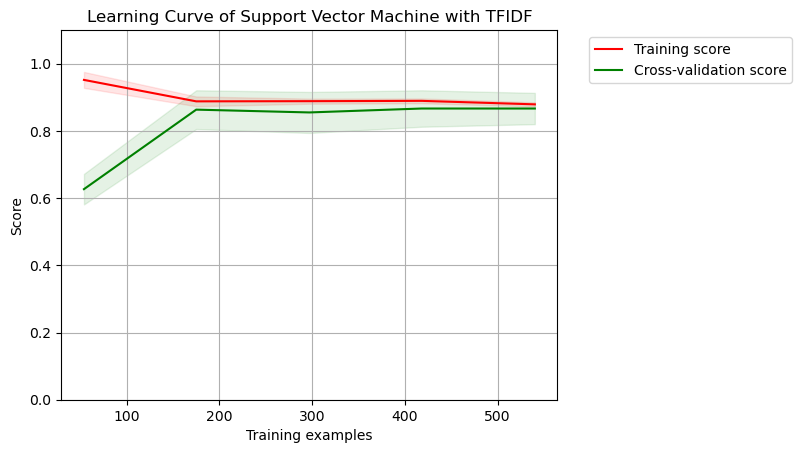

In [22]:
svm_tfidf = svm.SVC(kernel='sigmoid')
build_model(svm_tfidf, "Support Vector Machine with TFIDF", X_train_tfidf, X_test_tfidf, X_val_tfidf, y_train_tfidf, y_test_tfidf ,y_val_tfidf ,10)

SVM_tfidf_error  = analyze_error(X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf ,y_pred)
display(SVM_tfidf_error.head())

# Random Forest (TF_IDF)

Cross Validation Accuracy :   [0.86666667 0.8        0.93333333 0.93333333 0.85       0.83333333
 0.93333333 0.9        0.78333333 0.86666667]

 Average Cross Validation Accuracy :   0.8699999999999999

 Testing accuracy :   0.875

 Validation accuracy :   0.87
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.68      0.88      0.77        26
           b       0.88      0.76      0.81        49
           c       0.95      0.88      0.91        41
           d       0.95      0.93      0.94        44
           e       0.88      0.95      0.92        40

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200


 Confusion Matrix: 

[[23  2  0  0  1]
 [ 7 37  2  1  2]
 [ 2  2 36  1  0]
 [ 0  1  0 41  2]
 [ 2  0  0  0 38]]
-----------------------------------------

,Document_error,Correct,Predicted
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",b,a
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",b,a
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",b,a
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",b,d
4,"[0.0, 0.07780549250902212, 0.0, 0.0, 0.0, 0.0,...",b,a


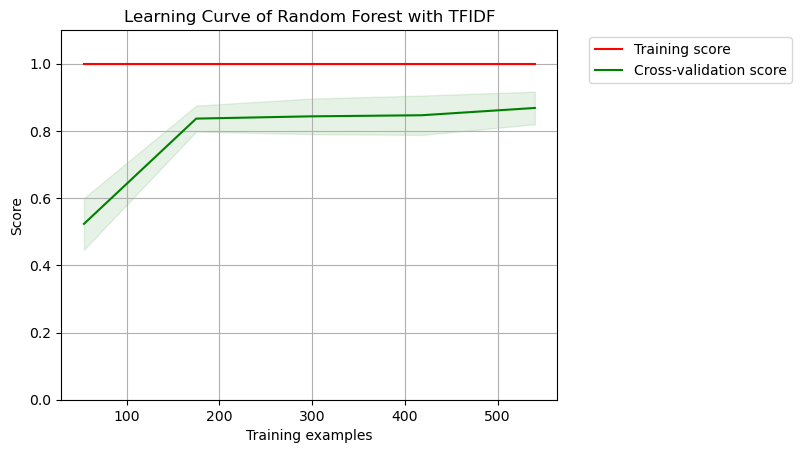

In [23]:
rf_tfidf = RandomForestClassifier(n_estimators=100)
build_model(rf_tfidf, "Random Forest with TFIDF", X_train_tfidf, X_test_tfidf, X_val_tfidf, y_train_tfidf, y_test_tfidf ,y_val_tfidf ,10)

rf_tfidf_error = analyze_error(X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf, y_pred)
display(rf_tfidf_error.head())

# Naïve Bayes (TF_IDF)

Cross Validation Accuracy :   [0.9        0.78333333 0.9        0.93333333 0.86666667 0.83333333
 0.91666667 0.9        0.78333333 0.85      ]

 Average Cross Validation Accuracy :   0.8666666666666666

 Testing accuracy :   0.9

 Validation accuracy :   0.885
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       1.00      0.81      0.89        26
           b       0.71      1.00      0.83        49
           c       1.00      0.88      0.94        41
           d       1.00      0.91      0.95        44
           e       1.00      0.85      0.92        40

    accuracy                           0.90       200
   macro avg       0.94      0.89      0.91       200
weighted avg       0.93      0.90      0.90       200


 Confusion Matrix: 

[[21  5  0  0  0]
 [ 0 49  0  0  0]
 [ 0  5 36  0  0]
 [ 0  4  0 40  0]
 [ 0  6  0  0 34]]
------------------------------------------

,Document_error,Correct,Predicted
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b


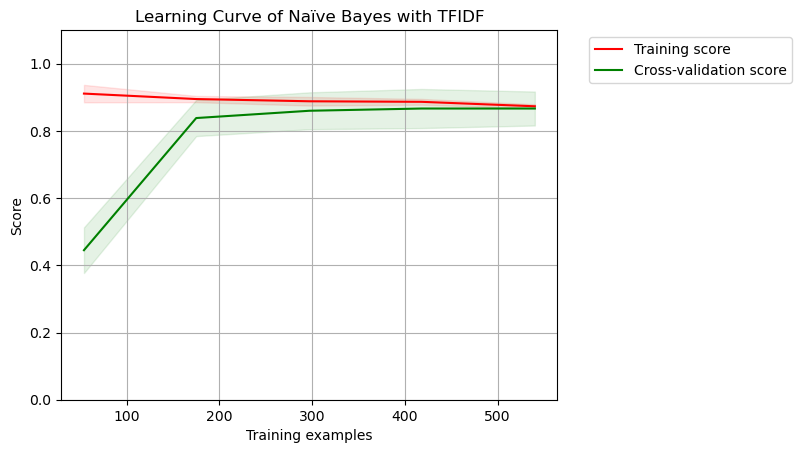

In [24]:
nb_tfidf = MultinomialNB()
build_model(nb_tfidf, "Naïve Bayes with TFIDF", X_train_tfidf, X_test_tfidf, X_val_tfidf, y_train_tfidf, y_test_tfidf ,y_val_tfidf ,10)

nb_tfidf_error = analyze_error(X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf, y_pred)
display(nb_tfidf_error.head())

# K-Nearest Neighbour (TF_IDF)

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Cross Validation Accuracy :   [0.85       0.73333333 0.91666667 0.9        0.85       0.81666667
 0.9        0.83333333 0.75       0.86666667]

 Average Cross Validation Accuracy :   0.8416666666666666

 Testing accuracy :   0.87

 Validation accuracy :   0.855
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.66      0.88      0.75        26
           b       0.78      0.82      0.80        49
           c       0.95      0.88      0.91        41
           d       1.00      0.91      0.95        44
           e       0.97      0.88      0.92        40

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.89      0.87      0.87       200


 Confusion Matrix: 

[[23  2  1  0  0]
 [ 7 40  1  0  1]
 [ 3  2 36  0  0]
 [ 1  3  0 40  0]
 [ 1  4  0  0 35]]
-----------------------------------------

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Average bias : 0.140
Average variance : 0.070
----------------------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Document_error,Correct,Predicted
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
2,"[0.0, 0.07780549250902212, 0.0, 0.0, 0.0, 0.0,...",d,a
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,a


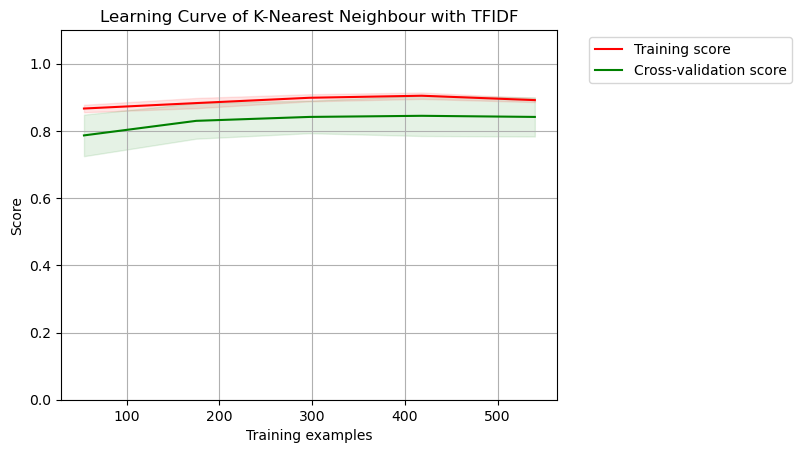

In [25]:
knn_tfidf =  KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', p=2)
build_model(knn_tfidf, "K-Nearest Neighbour with TFIDF", X_train_tfidf, X_test_tfidf, X_val_tfidf, y_train_tfidf, y_test_tfidf ,y_val_tfidf ,10)

knn_tfidf_error = analyze_error(X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf ,y_pred)
display(knn_tfidf_error.head())

# XG-Boost (TF_IDF)

Cross Validation Accuracy :   [0.86666667 0.78333333 0.93333333 0.93333333 0.85       0.83333333
 0.95       0.91666667 0.86666667 0.86666667]

 Average Cross Validation Accuracy :   0.8800000000000001

 Testing accuracy :   0.905

 Validation accuracy :   0.885
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        26
           1       0.91      0.86      0.88        49
           2       1.00      0.90      0.95        41
           3       1.00      0.91      0.95        44
           4       0.90      0.95      0.93        40

    accuracy                           0.91       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.92      0.91      0.91       200


 Confusion Matrix: 

[[24  1  0  0  1]
 [ 6 42  0  0  1]
 [ 3  1 37  0  0]
 [ 0  2  0 40  2]
 [ 2  0  0  0 38]]
----------------------------------------

,Document_error,Correct,Predicted
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a,4
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a,4
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a,1
3,"[0.0, 0.0, 0.056560538616592056, 0.0, 0.0, 0.0...",a,2
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a,3


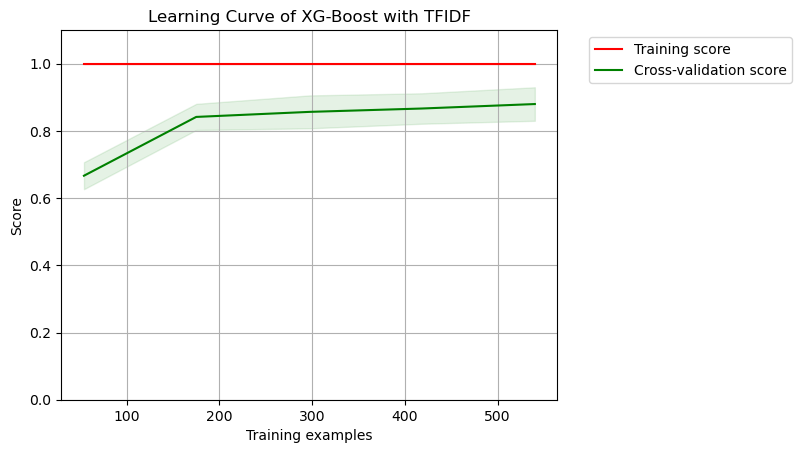

In [26]:
le = preprocessing.LabelEncoder()
xgb_tfidf = XGBClassifier()

y_train_tfidf_XGBoost = le.fit_transform(y_train_tfidf)
y_test_tfidf_XGBoost = le.fit_transform(y_test_tfidf)
y_val_tfidf_XGBoost = le.fit_transform(y_val_tfidf)

build_model(xgb_tfidf, "XG-Boost with TFIDF", X_train_tfidf, X_test_tfidf, X_val_tfidf, y_train_tfidf_XGBoost, y_test_tfidf_XGBoost ,y_val_tfidf_XGBoost ,10)

xgb_tfidf_error = analyze_error(X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf, y_pred)
display(xgb_tfidf_error.head())

# Stochastic Gradient Descent (TF_IDF)

Cross Validation Accuracy :   [0.93333333 0.81666667 0.9        0.91666667 0.88333333 0.85
 0.91666667 0.86666667 0.86666667 0.85      ]

 Average Cross Validation Accuracy :   0.8799999999999999

 Testing accuracy :   0.905

 Validation accuracy :   0.915
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.81      0.85      0.83        26
           b       0.77      0.98      0.86        49
           c       1.00      0.88      0.94        41
           d       1.00      0.91      0.95        44
           e       1.00      0.88      0.93        40

    accuracy                           0.91       200
   macro avg       0.92      0.90      0.90       200
weighted avg       0.92      0.91      0.91       200


 Confusion Matrix: 

[[22  4  0  0  0]
 [ 1 48  0  0  0]
 [ 2  3 36  0  0]
 [ 0  4  0 40  0]
 [ 2  3  0  0 35]]
----------------------------------------------

,Document_error,Correct,Predicted
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,a
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,a
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,b
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",d,a


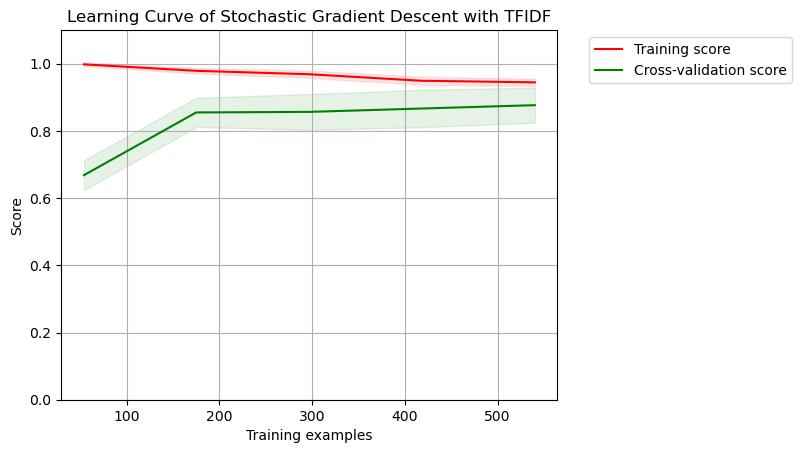

In [27]:
sgd_tfidf = SGDClassifier(loss='log')
build_model(sgd_tfidf, "Stochastic Gradient Descent with TFIDF", X_train_tfidf, X_test_tfidf, X_val_tfidf, y_train_tfidf, y_test_tfidf ,y_val_tfidf ,10)

sgd_tfidf_error = analyze_error(X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf, y_pred)
display(sgd_tfidf_error.head())

###  3) N-Gram

In [28]:
bigram_vectorizer = CountVectorizer(ngram_range=(1,2))
bigram = bigram_vectorizer.fit_transform(data['100_Words'])
bigram_df = pd.DataFrame(bigram.toarray(), columns= bigram_vectorizer.get_feature_names())
bigram_df

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandoned,abandoned quarry,abandoned radio,abide,abide judgment,abide term,able,able choose,able explain,able harass,...,zip associated,zode,zode plan,zone,zone division,zoom,zoom streak,zoomed,zoomed away,zoomed wheeled
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split the Data into Training, Validation and Testing

In [29]:
X_ngram = bigram.toarray()
y_ngram = data['label']

print(X_ngram.shape)
print(y_ngram.shape)

(1000, 44097)
(1000,)


In [30]:
X_train_ngram, X_test_ngram, y_train_ngram, y_test_ngram = train_test_split(X_ngram, y_ngram, test_size=0.2, shuffle = True, random_state = 0)
X_train_ngram, X_val_ngram, y_train_ngram, y_val_ngram = train_test_split(X_train_ngram, y_train_ngram, test_size=0.25, random_state= 0)  

# Support Vector Machine (N-Gram)

Cross Validation Accuracy :   [0.86666667 0.8        0.9        0.93333333 0.86666667 0.83333333
 0.91666667 0.9        0.78333333 0.86666667]

 Average Cross Validation Accuracy :   0.8666666666666666

 Testing accuracy :   0.9

 Validation accuracy :   0.885
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.95      0.81      0.88        26
           b       0.72      1.00      0.84        49
           c       1.00      0.88      0.94        41
           d       1.00      0.91      0.95        44
           e       1.00      0.85      0.92        40

    accuracy                           0.90       200
   macro avg       0.94      0.89      0.90       200
weighted avg       0.93      0.90      0.90       200


 Confusion Matrix: 

[[21  5  0  0  0]
 [ 0 49  0  0  0]
 [ 1  4 36  0  0]
 [ 0  4  0 40  0]
 [ 0  6  0  0 34]]
------------------------------------------

,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,a


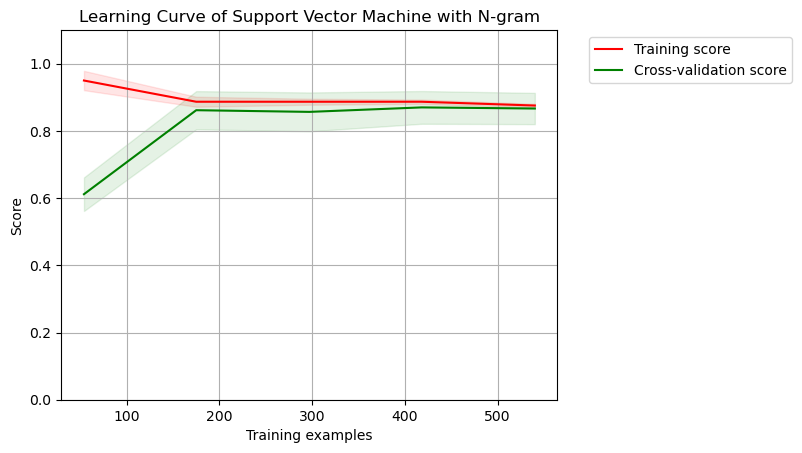

In [31]:
svm_n_gram = svm.SVC(kernel='sigmoid')
build_model(svm_n_gram, "Support Vector Machine with N-gram", X_train_ngram, X_test_ngram, X_val_ngram, y_train_ngram, y_test_ngram, y_val_ngram ,10)

svm_ngram_error = analyze_error(X_train_ngram, y_train_ngram, X_test_ngram, y_test_ngram ,y_pred)
display(svm_ngram_error.head())

# Random Forest (N-Gram)

Cross Validation Accuracy :   [0.9        0.76666667 0.91666667 0.93333333 0.85       0.9
 0.95       0.86666667 0.81666667 0.9       ]

 Average Cross Validation Accuracy :   0.8799999999999999

 Testing accuracy :   0.89

 Validation accuracy :   0.865
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.71      0.85      0.77        26
           b       0.87      0.82      0.84        49
           c       0.95      0.88      0.91        41
           d       0.93      0.93      0.93        44
           e       0.95      0.97      0.96        40

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200


 Confusion Matrix: 

[[22  3  0  0  1]
 [ 5 40  2  2  0]
 [ 3  1 36  1  0]
 [ 0  2  0 41  1]
 [ 1  0  0  0 39]]
------------------------------------------------

,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,a
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,a
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,d
3,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,a
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,e


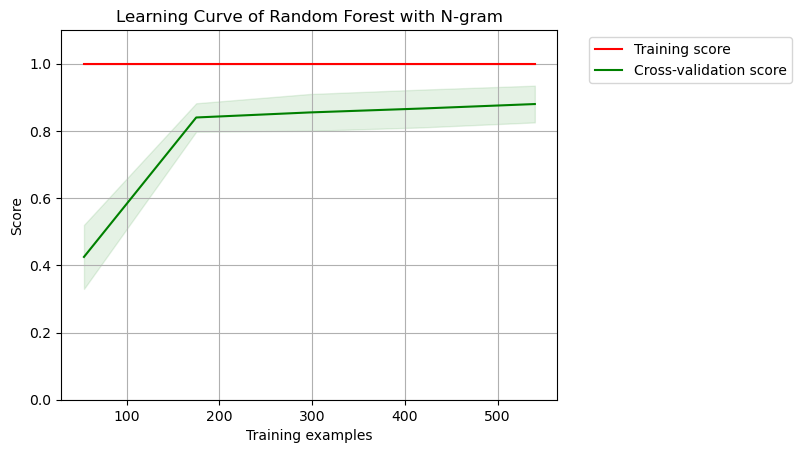

In [32]:
rf_ngram = RandomForestClassifier(n_estimators=100)
build_model(rf_ngram, "Random Forest with N-gram", X_train_ngram, X_test_ngram, X_val_ngram, y_train_ngram, y_test_ngram, y_val_ngram ,10)

rf_ngram_error = analyze_error(X_train_ngram, y_train_ngram, X_test_ngram, y_test_ngram, y_pred)
display(rf_ngram_error.head())

# Naïve Bayes (N-Gram)

Cross Validation Accuracy :   [0.9        0.78333333 0.9        0.93333333 0.86666667 0.83333333
 0.91666667 0.9        0.78333333 0.86666667]

 Average Cross Validation Accuracy :   0.8683333333333334

 Testing accuracy :   0.9

 Validation accuracy :   0.885
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.95      0.81      0.88        26
           b       0.72      1.00      0.84        49
           c       1.00      0.88      0.94        41
           d       1.00      0.91      0.95        44
           e       1.00      0.85      0.92        40

    accuracy                           0.90       200
   macro avg       0.94      0.89      0.90       200
weighted avg       0.93      0.90      0.90       200


 Confusion Matrix: 

[[21  5  0  0  0]
 [ 0 49  0  0  0]
 [ 1  4 36  0  0]
 [ 0  4  0 40  0]
 [ 0  6  0  0 34]]
------------------------------------------

,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,a


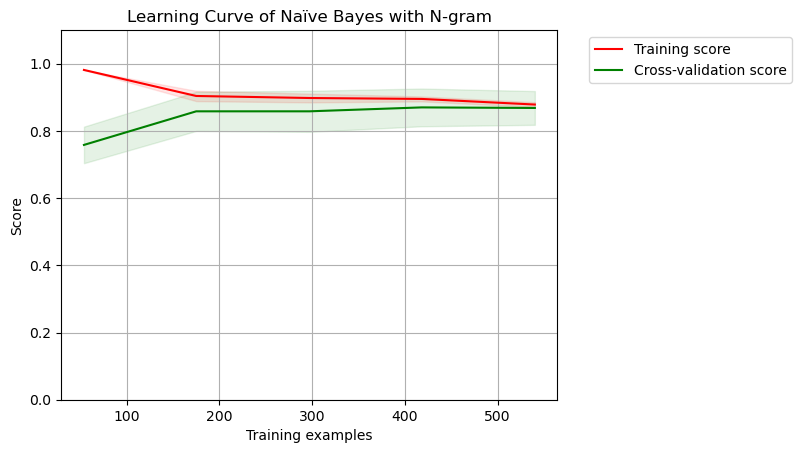

In [33]:
nb_ngram = MultinomialNB()
build_model(nb_ngram, "Naïve Bayes with N-gram", X_train_ngram, X_test_ngram, X_val_ngram, y_train_ngram, y_test_ngram, y_val_ngram ,10)

nb_ngram_error = analyze_error(X_train_ngram, y_train_ngram, X_test_ngram, y_test_ngram, y_pred)
display(nb_ngram_error.head())

# K-Nearest Neighbour (N-Gram)

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Cross Validation Accuracy :   [0.83333333 0.71666667 0.9        0.91666667 0.85       0.81666667
 0.9        0.81666667 0.73333333 0.86666667]

 Average Cross Validation Accuracy :   0.835

 Testing accuracy :   0.875

 Validation accuracy :   0.86
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.68      0.88      0.77        26
           b       0.79      0.84      0.81        49
           c       0.95      0.88      0.91        41
           d       1.00      0.91      0.95        44
           e       0.97      0.88      0.92        40

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.89      0.88      0.88       200


 Confusion Matrix: 

[[23  2  1  0  0]
 [ 6 41  1  0  1]
 [ 3  2 36  0  0]
 [ 1  3  0 40  0]
 [ 1  4  0  0 35]]
------------------------------------------------------

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Average bias : 0.145
Average variance : 0.068
----------------------------------------------------------------------------------------------


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
2,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,a
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,b
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",d,a


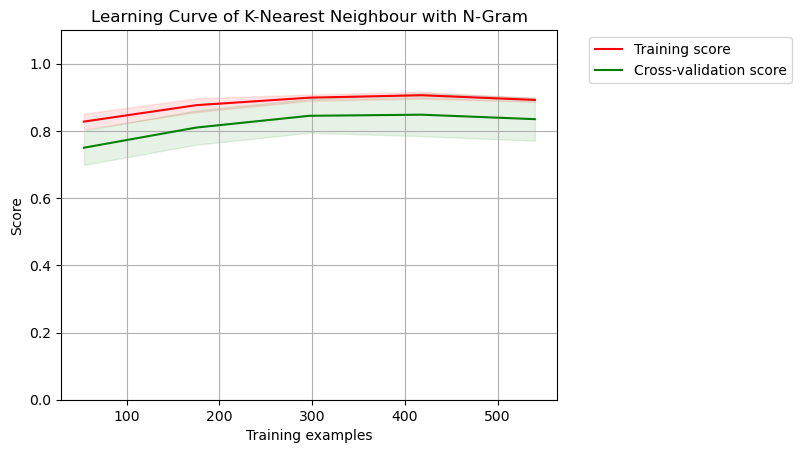

In [34]:
knn_n_gram =  KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', p=2)
build_model(knn_n_gram, "K-Nearest Neighbour with N-Gram", X_train_ngram, X_test_ngram, X_val_ngram, y_train_ngram, y_test_ngram, y_val_ngram ,10)

knn_ngram_error = analyze_error(X_train_ngram, y_train_ngram, X_test_ngram, y_test_ngram, y_pred)
display(knn_ngram_error.head())

# XG-Boost (N-Gram)

Cross Validation Accuracy :   [0.9        0.78333333 0.93333333 0.93333333 0.88333333 0.9
 0.93333333 0.88333333 0.85       0.86666667]

 Average Cross Validation Accuracy :   0.8866666666666665

 Testing accuracy :   0.905

 Validation accuracy :   0.87
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        26
           1       0.88      0.88      0.88        49
           2       1.00      0.90      0.95        41
           3       0.98      0.93      0.95        44
           4       0.93      0.95      0.94        40

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200


 Confusion Matrix: 

[[22  3  0  0  1]
 [ 4 43  0  1  1]
 [ 3  1 37  0  0]
 [ 0  2  0 41  1]
 [ 2  0  0  0 38]]
------------------------------------------------

,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,4
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,4
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,1
3,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",a,2
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",a,3


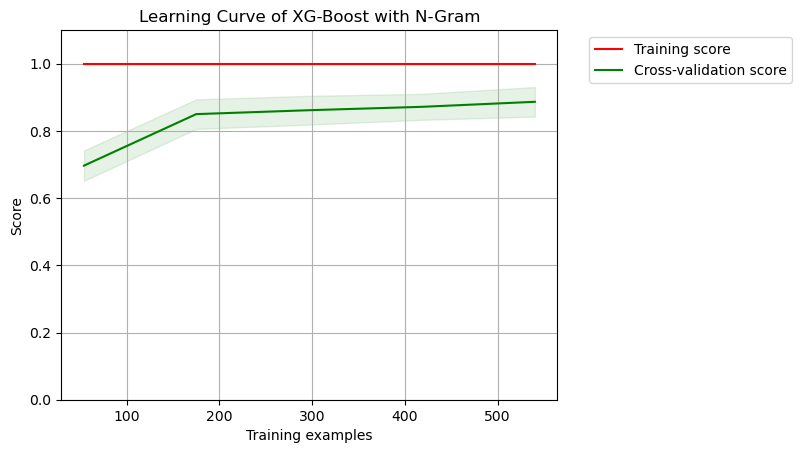

In [35]:
le = preprocessing.LabelEncoder()
xgb_ngram = XGBClassifier()

y_train_ngram_XGBoost = le.fit_transform(y_train_ngram)
y_test_ngram_XGBoost = le.fit_transform(y_test_ngram)
y_val_ngram_XGBoost = le.fit_transform(y_val_ngram)

build_model(xgb_ngram, "XG-Boost with N-Gram", X_train_ngram, X_test_ngram, X_val_ngram, y_train_ngram_XGBoost, y_test_ngram_XGBoost, y_val_ngram_XGBoost ,10)

xgb_ngram_error = analyze_error(X_train_ngram, y_train_ngram, X_test_ngram, y_test_ngram, y_pred)
display(xgb_ngram_error.head())

# Stochastic Gradient Descent (N-Gram)

Cross Validation Accuracy :   [0.9        0.81666667 0.93333333 0.93333333 0.83333333 0.85
 0.93333333 0.9        0.81666667 0.86666667]

 Average Cross Validation Accuracy :   0.8783333333333333

 Testing accuracy :   0.895

 Validation accuracy :   0.9
----------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           a       0.77      0.92      0.84        26
           b       0.89      0.84      0.86        49
           c       0.90      0.90      0.90        41
           d       0.91      0.93      0.92        44
           e       0.97      0.90      0.94        40

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200


 Confusion Matrix: 

[[24  1  0  0  1]
 [ 3 41  3  2  0]
 [ 2  1 37  1  0]
 [ 0  3  0 41  0]
 [ 2  0  1  1 36]]
------------------------------------------------

,Document_error,Correct,Predicted
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,d
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,a
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,a
3,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,a
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",b,a


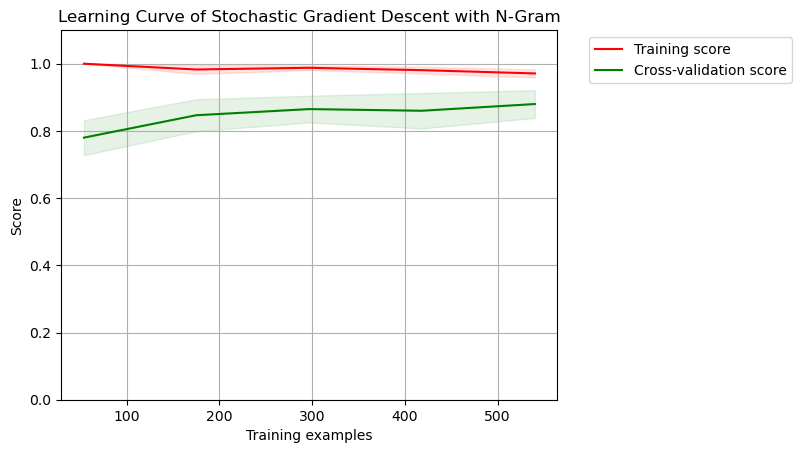

In [36]:
#The Champion Model
sgd_ngram = SGDClassifier(loss='log')
build_model(sgd_ngram, "Stochastic Gradient Descent with N-Gram", X_train_ngram, X_test_ngram, X_val_ngram, y_train_ngram, y_test_ngram, y_val_ngram ,10)

sgd_ngram_error = analyze_error(X_train_ngram, y_train_ngram, X_test_ngram, y_test_ngram, y_pred)
display(sgd_ngram_error.head())

# Plotting Learning Curve 

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

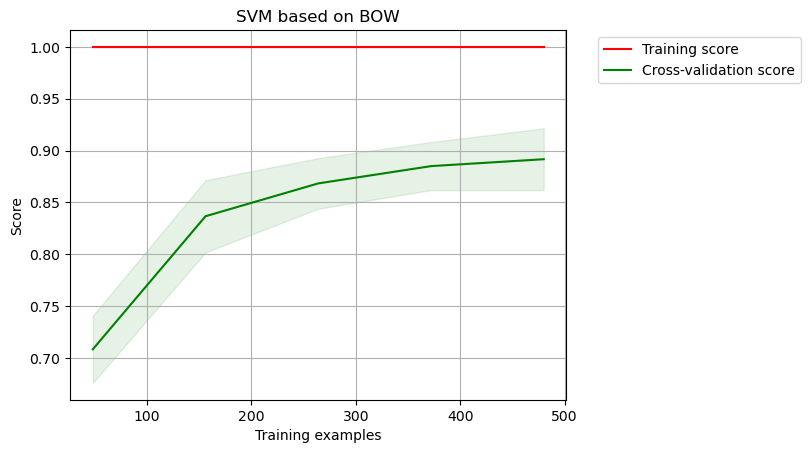

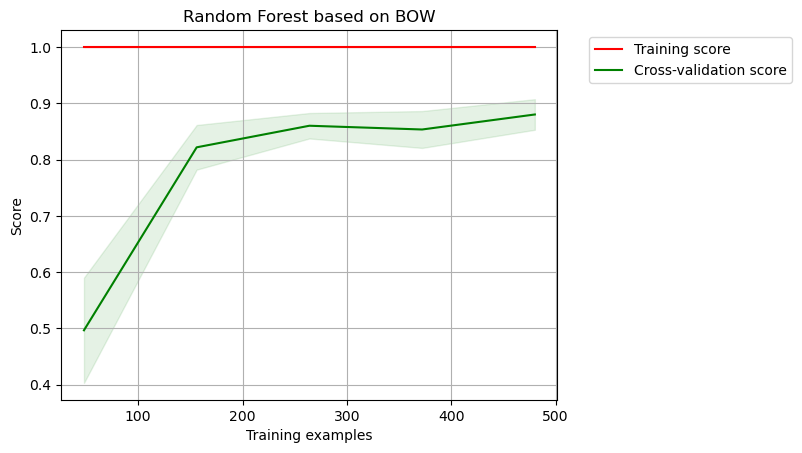

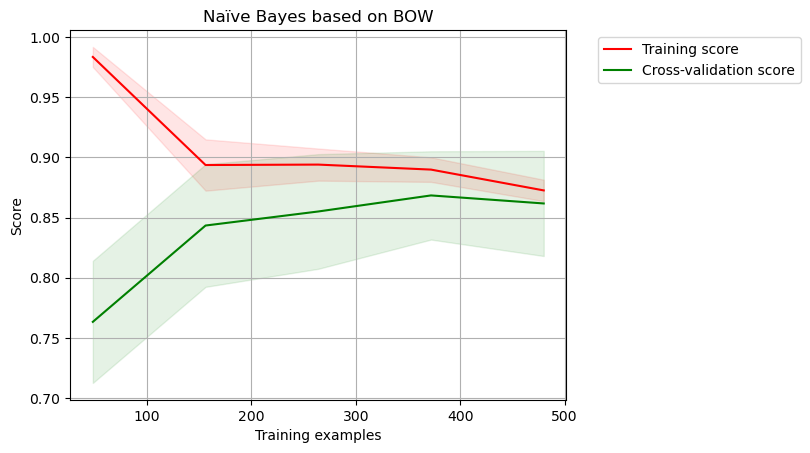

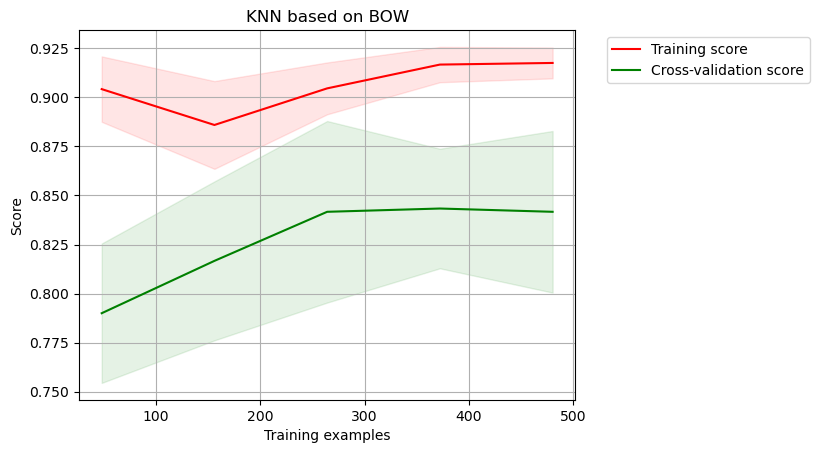

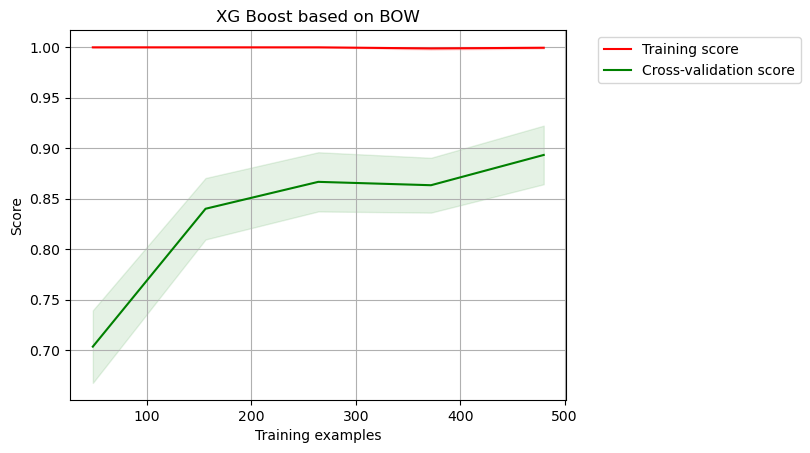

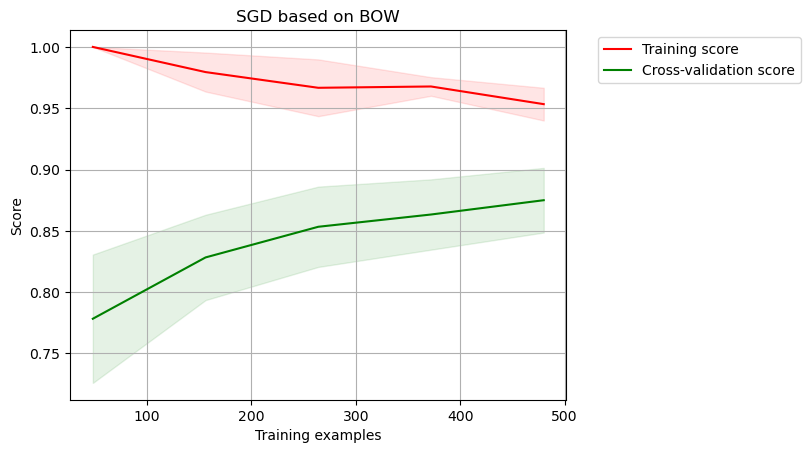

In [37]:
#BOW
plot_learning_curve(svm_bow, "SVM based on BOW", X_train, y_train, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("svm_bow.png")

plot_learning_curve(rf_bow, "Random Forest based on BOW", X_train, y_train, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("rf_bow.png")

plot_learning_curve(nb_bow, "Naïve Bayes based on BOW", X_train, y_train, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("nb_bow.png")

plot_learning_curve(knn_bow, "KNN based on BOW", X_train, y_train, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("knn_bow.png")

plot_learning_curve(xgb_bow, "XG Boost based on BOW", X_train, y_train_XGBoost, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("xgboost_bow.png")

plot_learning_curve(sgd_bow, "SGD based on BOW", X_train, y_train, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("sgd_bow.png")

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

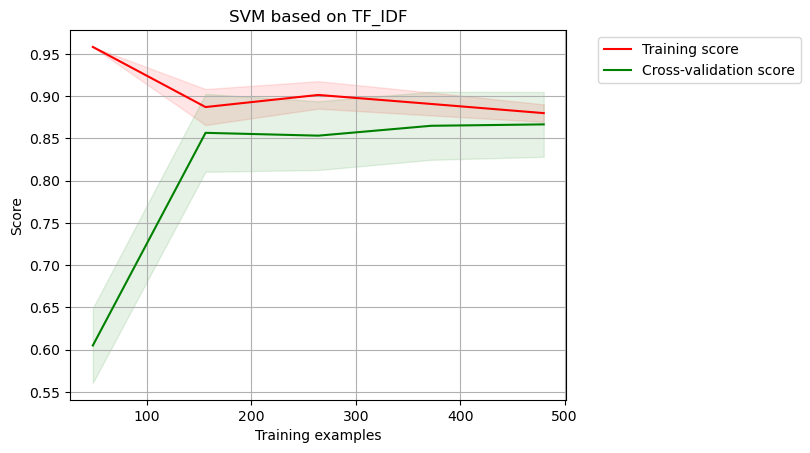

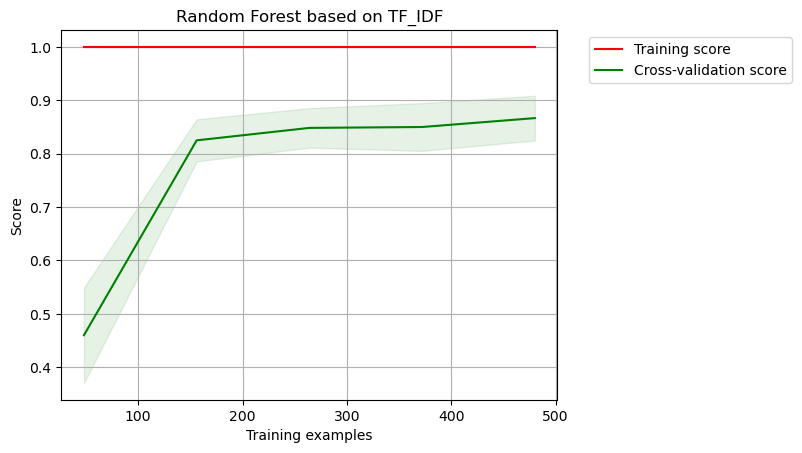

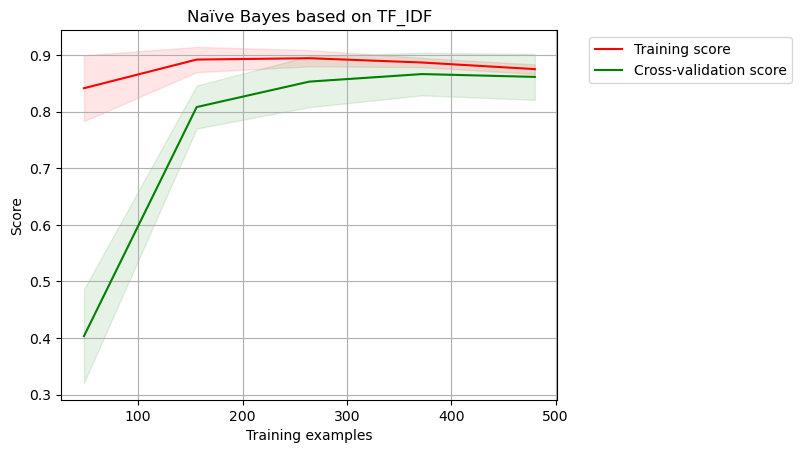

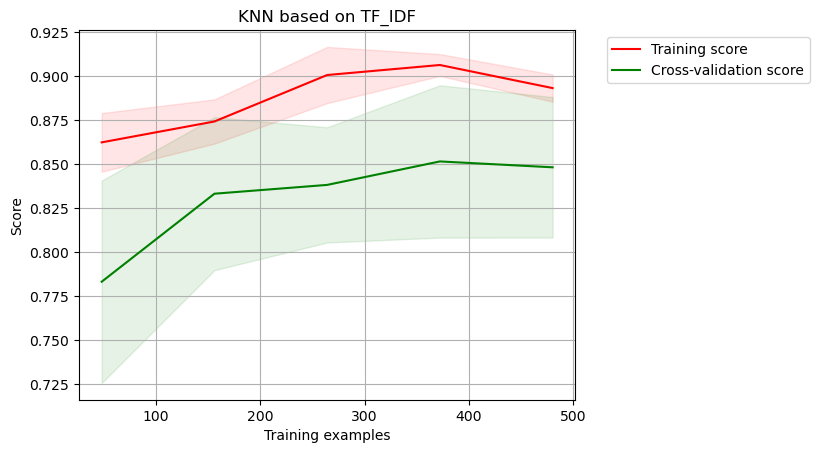

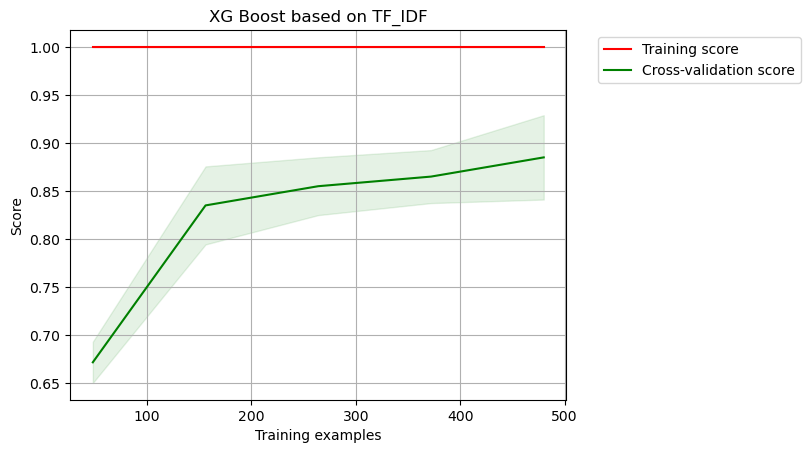

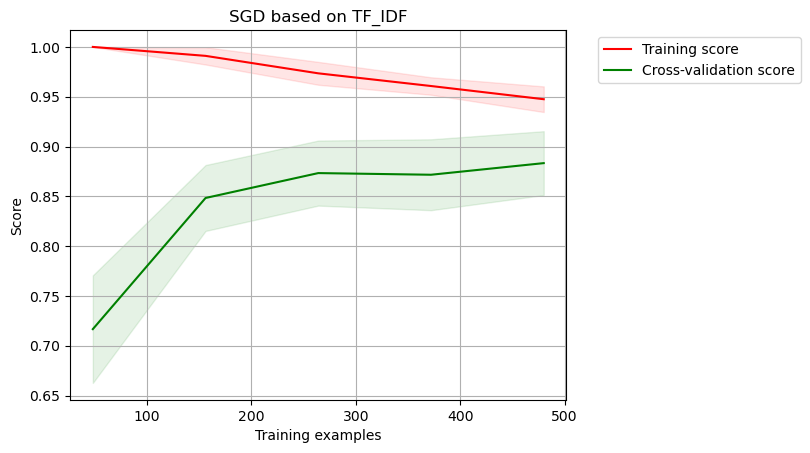

In [38]:
#TF_IDF
plot_learning_curve(svm_tfidf, "SVM based on TF_IDF", X_train_tfidf, y_train_tfidf, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("svm_tfidf.png")

plot_learning_curve(rf_tfidf, "Random Forest based on TF_IDF", X_train_tfidf, y_train_tfidf, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("rf_tfidf.png")

plot_learning_curve(nb_tfidf, "Naïve Bayes based on TF_IDF", X_train_tfidf, y_train_tfidf, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("nb_tfidf.png")

plot_learning_curve(knn_tfidf, "KNN based on TF_IDF", X_train_tfidf, y_train_tfidf, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("knn_tfidf.png")

plot_learning_curve(xgb_tfidf, "XG Boost based on TF_IDF", X_train_tfidf,  y_train_tfidf_XGBoost, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("xgboost_tfidf.png")

plot_learning_curve(sgd_tfidf, "SGD based on TF_IDF", X_train_tfidf, y_train_tfidf, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("sgd_tfidf.png")

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

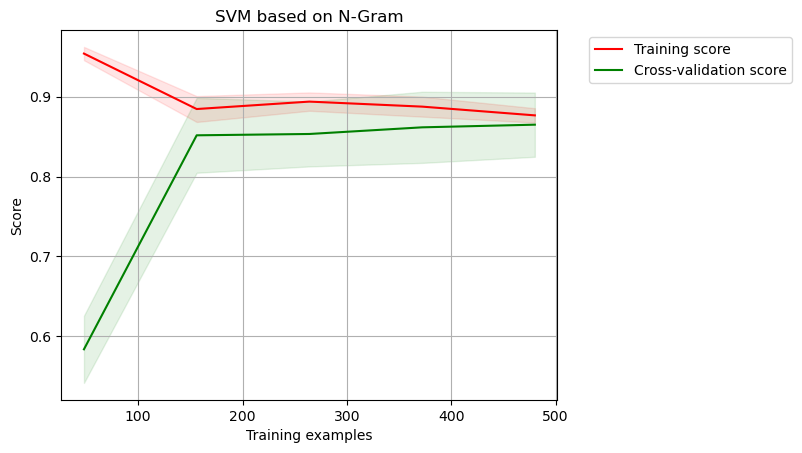

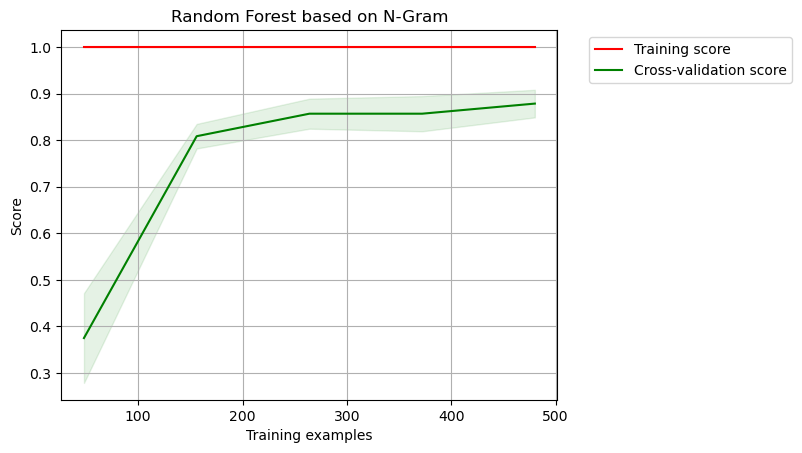

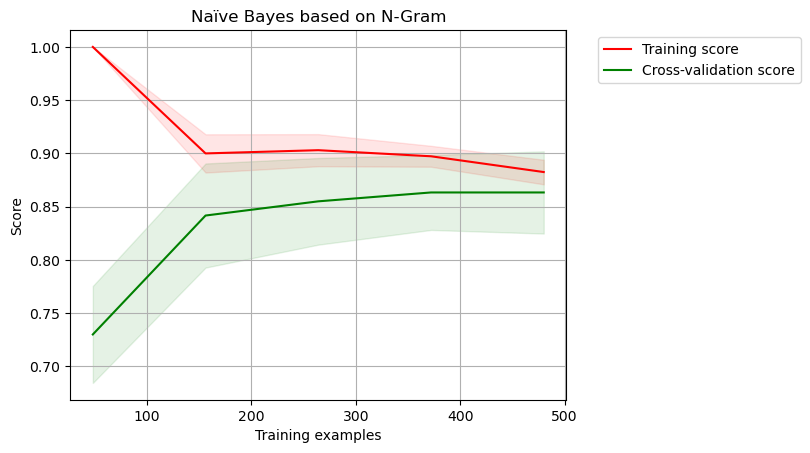

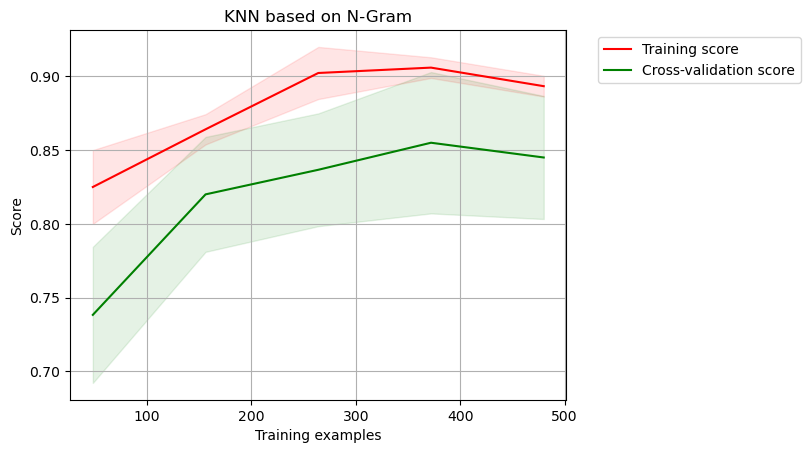

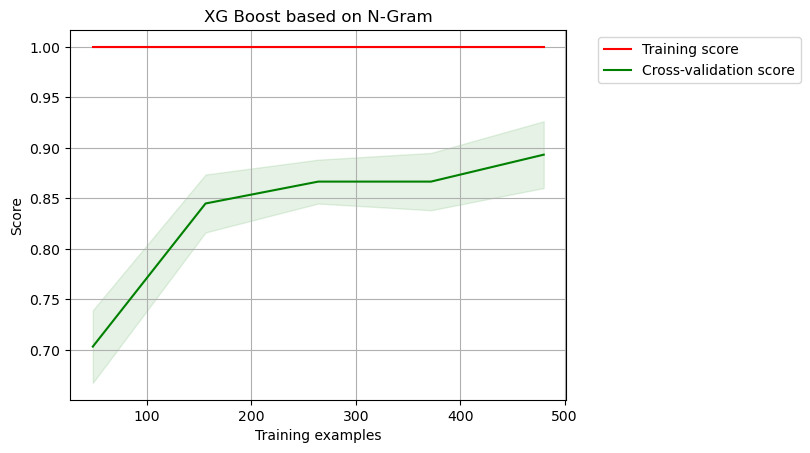

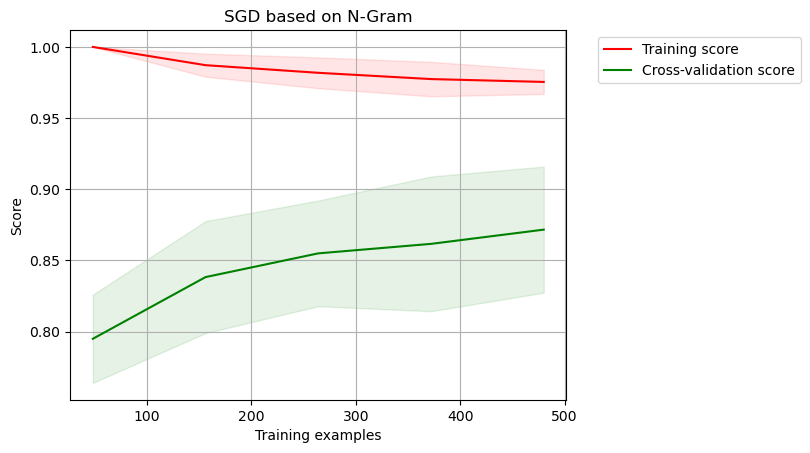

In [39]:
#N-Gram
plot_learning_curve(svm_n_gram, "SVM based on N-Gram", X_train_ngram, y_train_ngram, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("svm_ngram.png")

plot_learning_curve(rf_ngram, "Random Forest based on N-Gram", X_train_ngram, y_train_ngram, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("rf_ngram.png")

plot_learning_curve(nb_ngram, "Naïve Bayes based on N-Gram", X_train_ngram, y_train_ngram, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("nb_ngram.png")

plot_learning_curve(knn_n_gram, "KNN based on N-Gram", X_train_ngram, y_train_ngram, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("knn_ngram.png")

plot_learning_curve(xgb_ngram, "XG Boost based on N-Gram", X_train_ngram,  y_train_ngram_XGBoost, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("xgboost_ngram.png")

plot_learning_curve(sgd_ngram, "SGD based on N-Gram", X_train_ngram, y_train_ngram, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0,5))
plt.savefig("sgd_ngram.png")

# Text Classification using BERT

In [40]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

In [41]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

C:\anaconda\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Lab 11\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [42]:
# Tokenize the input data
def tokenize_data(text, tokenizer, max_len):
    input_ids = []
    attention_masks = []
    for sentence in text:
        encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=max_len, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

In [43]:
train_inputs, train_masks = tokenize_data(train_data['100_Words'], tokenizer, 100)
val_inputs, val_masks = tokenize_data(val_data['100_Words'], tokenizer, 100)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\anaconda\lib\site-packages\transformers\tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [44]:
# Convert the labels to integers
label_dict = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}
train_labels = torch.tensor([label_dict[label] for label in train_data['label']])
val_labels = torch.tensor([label_dict[label] for label in val_data['label']])

In [45]:
# Create a PyTorch dataset
train_dataset = TensorDataset(train_inputs, train_masks, train_labels)
val_dataset = TensorDataset(val_inputs, val_masks, val_labels)

In [46]:
# Create a DataLoader to feed the data into the model in batches
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [47]:
# Load the pre-trained BERT model and modify the final layer to match the number of labels
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [48]:
# Set the device to use (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [49]:
# Set the optimizer and learning rate
optimizer = AdamW(model.parameters(), lr=2e-5)

C:\anaconda\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [50]:
# Train the model
epochs = 4
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        loss = outputs[0]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        model.zero_grad()
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average training loss: {}".format(avg_train_loss))

    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    for batch in val_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        with torch.no_grad():
            outputs = model(**inputs)
        loss = outputs[0]
        logits = outputs[1]
        total_eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        total_eval_accuracy += (logits.argmax(axis=1) == label_ids).sum()
        nb_eval_steps += 1
    avg_val_accuracy = total_eval_accuracy / (len(val_dataloader) * batch_size)
    avg_val_loss = total_eval_loss / len(val_dataloader)
    print("Validation accuracy: {}".format(avg_val_accuracy))
    print("Validation loss: {}".format(avg_val_loss))

Average training loss: 1.4323733973503112
Validation accuracy: 0.7403846153846154
Validation loss: 1.1212928340985224
Average training loss: 0.7748139035701752
Validation accuracy: 0.8221153846153846
Validation loss: 0.5743648409843445
Average training loss: 0.40902445137500765
Validation accuracy: 0.8173076923076923
Validation loss: 0.47086501580018264
Average training loss: 0.3334943078458309
Validation accuracy: 0.8365384615384616
Validation loss: 0.4136251893181067
